# Pergunta a ser respondida:

## Quais fatores (horário, área, local) mais influenciam a ocorrência de crimes contra vítimas de diferentes idades?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/jaspreetkhokhar/los-angeles-crime-data-2021-2023

In [34]:
crime = pd.read_csv('/home/guiduarte/Documents/01-FaculdadeSemestreAtual/Modelos_Lineares/Datasets/crime_data.csv')
crime = crime.rename(columns={'Date Rptd': 'Date Reported'})
crime = crime.rename(columns={'DATE OCC': 'Date Occurred'})
crime = crime.rename(columns={'TIME OCC': 'Time Occurred'})
crime = crime.rename(columns={'AREA': 'Area Code'})
crime = crime.rename(columns={'AREA NAME': 'Area Name'})
crime = crime.rename(columns={'Crm Cd': 'Crime Code'})
crime = crime.rename(columns={'Crm Cd Desc': 'Crime Description'})
crime = crime.rename(columns={'Vict Age': 'Victim Age'})
crime = crime.rename(columns={'Vict Sex': 'Victim Sex'})
crime = crime.rename(columns={'Weapon Desc': 'Weapon Description'})
crime = crime.rename(columns={'Premis Desc': 'Premises Description'})
crime = crime.rename(columns={'Status Desc': 'Status Description'})
crime = crime.rename(columns={'Vict Descent': 'Victim Descent'})
crime = crime.rename(columns={'LOCATION': 'Location'})
crime['Date Reported'] = pd.to_datetime(crime['Date Reported'])
crime['Date Occurred'] = pd.to_datetime(crime['Date Occurred'])
# Minutos após a meia noite
crime['Time Occurred'] = pd.to_datetime(crime['Time Occurred'], format='%H:%M').dt.hour * 60 + pd.to_datetime(crime['Time Occurred'], format='%H:%M').dt.minute
# crime = crime.astype({'Part 1-2': 'object', 'Crime Code': 'object', 'Area Code': 'object'})

crime.head()

,Date Reported,Date Occurred,Time Occurred,Area Code,Area Name,Part 1-2,Crime Code,Crime Description,Victim Age,Victim Sex,Victim Descent,Premises Description,Weapon Description,Status Description,Location
0,2022-04-12,2020-10-01,1,19,Mission,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,13400 RANGOON ST
1,2023-01-05,2020-02-01,480,2,Rampart,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,900 N MARIPOSA AV
2,2023-03-21,2020-03-15,720,19,Mission,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,8500 COLUMBUS AV
3,2023-06-04,2020-07-01,720,20,Olympic,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1700 S WESTMORELAND AV
4,2022-02-02,2020-02-09,720,11,Northeast,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,30,F,W,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Other,2800 WAVERLY DR


The most serious crimes — known as Part 1 offenses, including rape, murder, grand theft and vehicle burglary

In [4]:
crime.columns

Index(['Date Reported', 'Date Occurred', 'Time Occurred', 'Area Code',
       'Area Name', 'Part 1-2', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Sex', 'Victim Descent', 'Premises Description',
       'Weapon Description', 'Status Description', 'Location'],
      dtype='object')

In [5]:
crime.describe()

,Date Reported,Date Occurred,Time Occurred,Area Code,Part 1-2,Crime Code,Victim Age
count,230545,230545,230545.000000,230545.000000,230545.000000,230545.000000,230545.000000
mean,2022-07-13 12:54:00.023422464,2022-07-06 11:02:39.852522752,813.341899,10.466881,1.544991,508.044629,34.451513
min,2021-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,1.000000,110.000000,-2.000000
25%,2021-10-13 00:00:00,2021-10-06 00:00:00,540.000000,5.000000,1.000000,230.000000,23.000000
50%,2022-07-14 00:00:00,2022-07-07 00:00:00,870.000000,11.000000,2.000000,624.000000,33.000000
75%,2023-04-18 00:00:00,2023-04-13 00:00:00,1145.000000,16.000000,2.000000,626.000000,46.000000
max,2023-12-31 00:00:00,2023-12-31 00:00:00,1439.000000,21.000000,2.000000,956.000000,99.000000
std,NaN,NaN,404.381538,6.225582,0.497973,240.542475,18.003355


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230545 entries, 0 to 230544
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date Reported         230545 non-null  datetime64[ns]
 1   Date Occurred         230545 non-null  datetime64[ns]
 2   Time Occurred         230545 non-null  int32         
 3   Area Code             230545 non-null  int64         
 4   Area Name             230545 non-null  object        
 5   Part 1-2              230545 non-null  int64         
 6   Crime Code            230545 non-null  int64         
 7   Crime Description     230545 non-null  object        
 8   Victim Age            230545 non-null  int64         
 9   Victim Sex            230545 non-null  object        
 10  Victim Descent        230545 non-null  object        
 11  Premises Description  230545 non-null  object        
 12  Weapon Description    230545 non-null  object        
 13 

In [7]:
crime.nunique()

Date Reported            1095
Date Occurred            1383
Time Occurred            1433
Area Code                  21
Area Name                  21
Part 1-2                    2
Crime Code                116
Crime Description         116
Victim Age                101
Victim Sex                  4
Victim Descent             19
Premises Description      293
Weapon Description         77
Status Description          6
Location                35528
dtype: int64

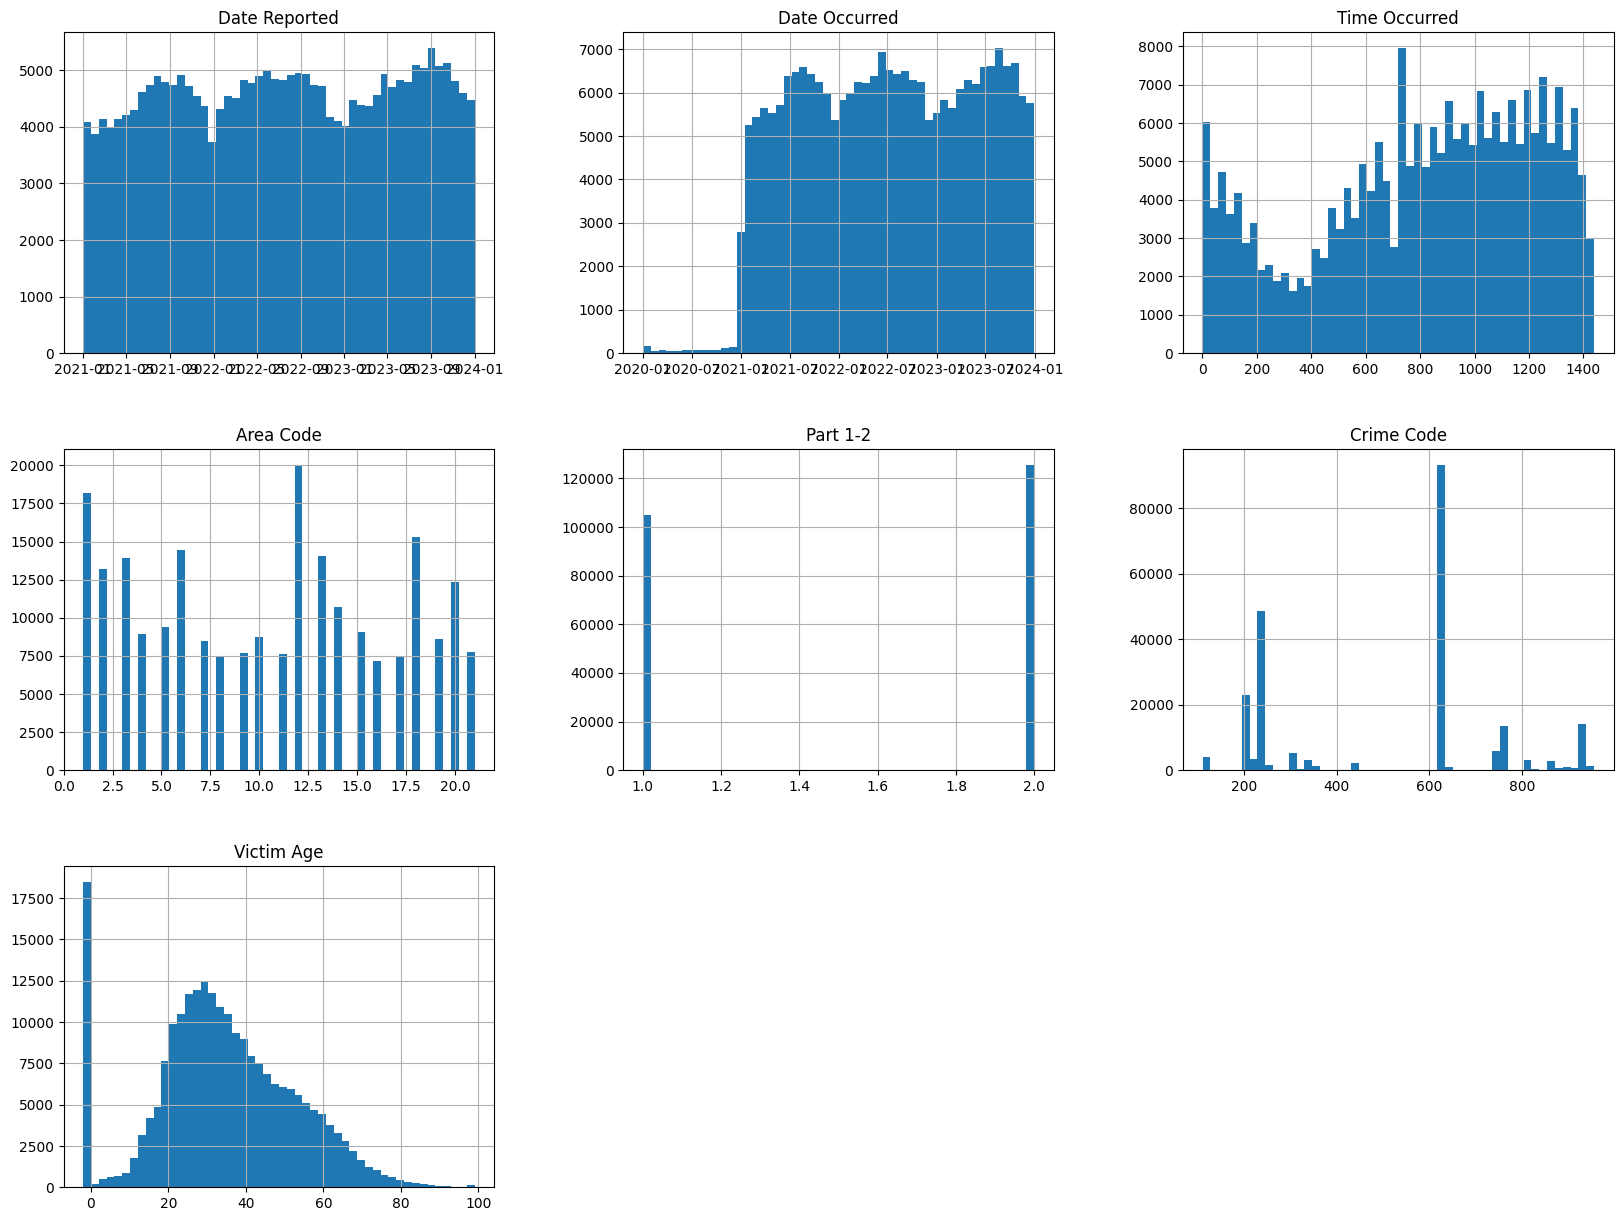

In [8]:
crime.hist(bins=50, figsize=(20, 15))
plt.show()

# Acenstralidade

In [9]:
crime['Victim Descent'].unique()

array(['H', 'W', 'O', 'X', 'B', 'A', 'F', 'K', 'P', 'I', 'C', 'U', 'V',
       'G', 'S', 'J', 'L', 'D', 'Z'], dtype=object)

In [10]:
descent_mapping = {
    'H': 'Hispanic',
    'W': 'White',
    'O': 'Other',
    'X': 'Unknown',
    'B': 'Black',
    'A': 'Asian',
    'F': 'Filipino',
    'K': 'Korean',
    'P': 'Pacific Islander',
    'I': 'American Indian/Alaska Native',
    'C': 'Chinese',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'G': 'Guamanian',
    'S': 'Samoan',
    'J': 'Japanese',
    'L': 'Cambodian',
    'D': 'Laotian',
    'Z': 'Asian Indian'
}

crime['Victim Descent'] = crime['Victim Descent'].map(descent_mapping)

In [11]:
crime['Victim Descent'].unique()

array(['Hispanic', 'White', 'Other', 'Unknown', 'Black', 'Asian',
       'Filipino', 'Korean', 'Pacific Islander',
       'American Indian/Alaska Native', 'Chinese', 'Hawaiian',
       'Vietnamese', 'Guamanian', 'Samoan', 'Japanese', 'Cambodian',
       'Laotian', 'Asian Indian'], dtype=object)

# Sexo da Vítima

In [12]:
crime['Victim Sex'].unique()

array(['F', 'M', 'X', 'H'], dtype=object)

In [13]:
sex_mapping = {
    'F': 'Female',
    'M': 'Male',
    'X': 'Unknown',
    'H': 'Other'
}

crime['Victim Sex'] = crime['Victim Sex'].map(sex_mapping)

In [14]:
crime['Victim Sex'].unique()

array(['Female', 'Male', 'Unknown', 'Other'], dtype=object)

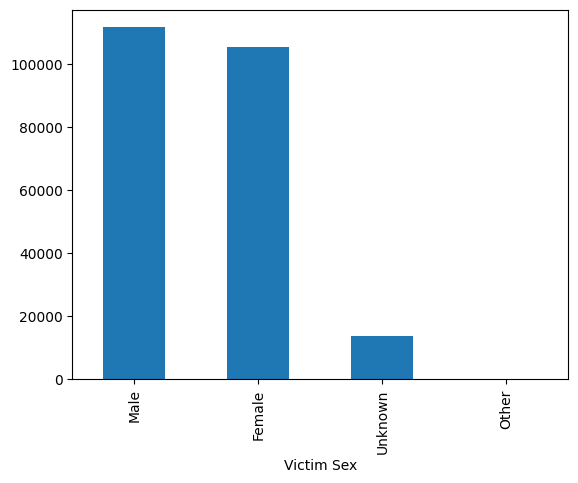

In [15]:
crime['Victim Sex'].value_counts().plot(kind='bar')
plt.show()

# Idade da Vítima

In [16]:
ages = crime['Victim Age'].unique()
print(sorted(ages))

[np.int64(-2), np.int64(-1), np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), 

In [17]:
negative_age_rows = crime[crime['Victim Age'] < 0]
pd.DataFrame(negative_age_rows)

,Date Reported,Date Occurred,Time Occurred,Area Code,Area Name,Part 1-2,Crime Code,Crime Description,Victim Age,Victim Sex,Victim Descent,Premises Description,Weapon Description,Status Description,Location
8,2023-06-02,2020-05-31,270,6,Hollywood,1,310,BURGLARY,-2,Unknown,Unknown,OTHER BUSINESS,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1700 ORCHID AV
79,2023-06-09,2020-06-01,720,14,Pacific,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,-2,Male,White,SINGLE FAMILY DWELLING,VERBAL THREAT,Invest Cont,3500 GRAND VIEW BL
45443,2023-06-26,2021-11-25,780,18,Southeast,1,761,BRANDISH WEAPON,-1,Female,Hispanic,PROJECT/TENEMENT/PUBLIC HOUSING,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH,Invest Cont,100 W 108TH ST


In [18]:
crime.shape

(230545, 15)

In [19]:
crime = crime[crime['Victim Age'] >= 0]

In [20]:
crime.shape

(230542, 15)

In [21]:
corr_matrix = crime.select_dtypes(include=[float, int]).corr()
corr_matrix['Victim Age'].sort_values(ascending=False)

Victim Age       1.000000
Crime Code       0.040291
Part 1-2         0.040209
Time Occurred    0.010511
Area Code       -0.005569
Name: Victim Age, dtype: float64

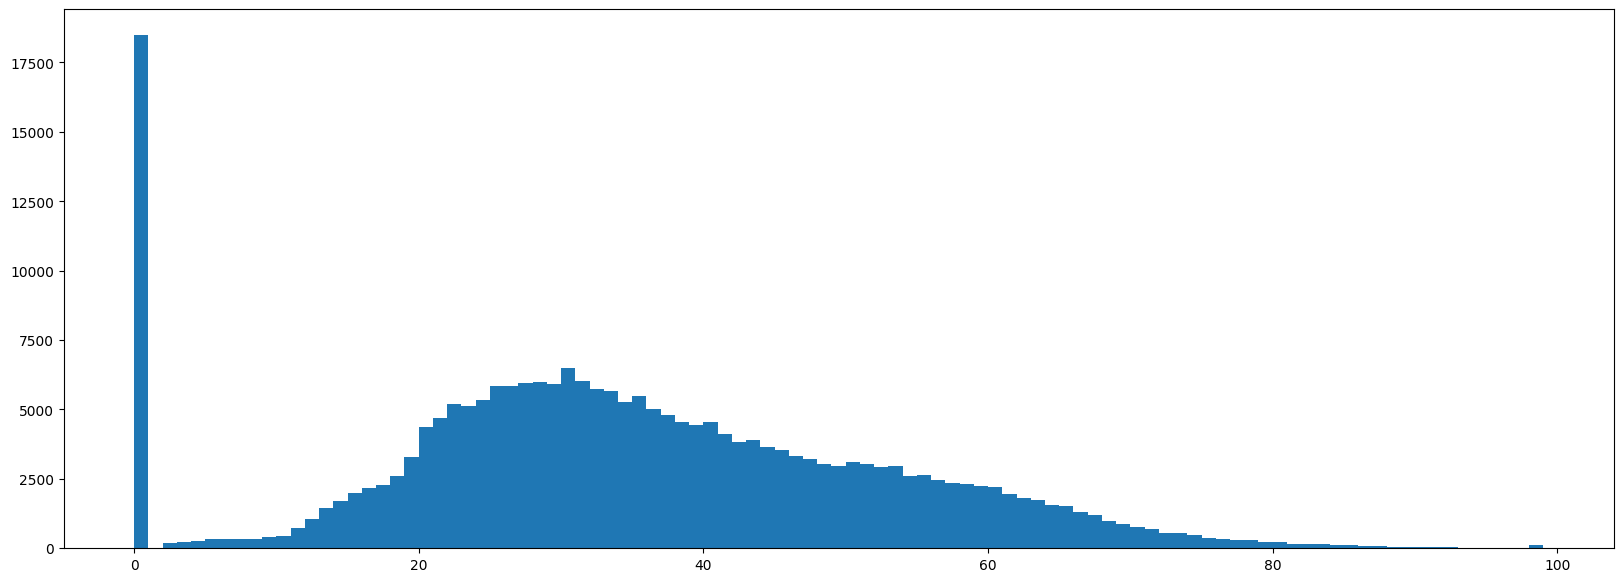

In [22]:
plt.figure(figsize=(20, 7))
plt.hist(crime['Victim Age'], bins=99)
plt.show()

Quando a idade da vitima é 0, a idade é desconhecida

In [23]:
crime_un = crime[((crime['Victim Age'] == 0) | (crime['Victim Descent'] == 'Unknown') | (crime['Victim Sex'] == 'Unknown'))]


crime_filtered = crime[~((crime['Victim Age'] == 0) | 
                         (crime['Victim Descent'] == 'Unknown') | 
                         (crime['Victim Sex'] == 'Unknown'))]

In [24]:
ages = crime_filtered['Victim Age'].unique()
print(sorted(ages))

[np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73),

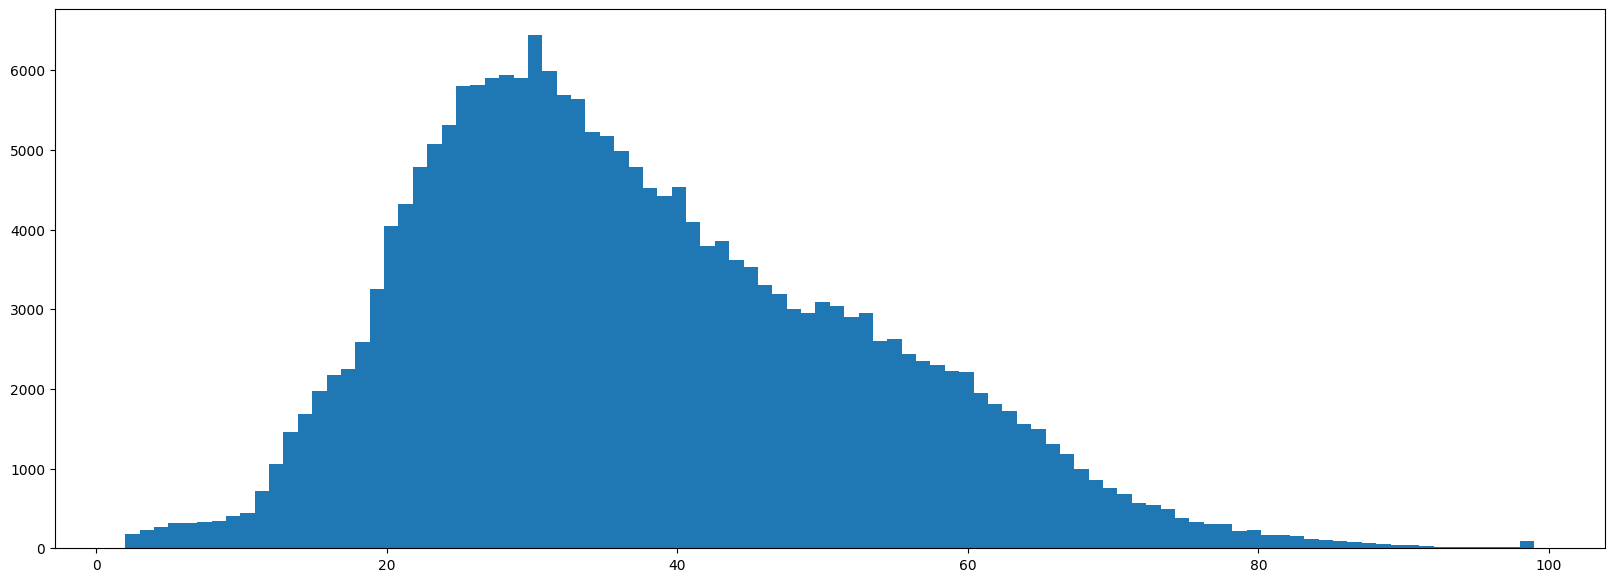

In [25]:
plt.figure(figsize=(20, 7))
plt.hist(crime_filtered['Victim Age'], bins=98) # não tem idade=1 nem idade>=100, então 98 bins para mostrar cada barra por idade
plt.show()

In [26]:
pd.crosstab(crime_filtered['Crime Description'], crime_filtered['Victim Age'])

Victim Age,2,3,4,5,6,7,8,9,10,11,...,90,91,92,93,94,95,96,97,98,99
Crime Description,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,37,20,20,18,20,24,27,30,43,...,3,8,2,2,1,3,0,1,3,12
ATTEMPTED ROBBERY,0,0,0,0,0,0,3,0,2,3,...,1,0,0,0,0,2,0,0,0,0
BATTERY - SIMPLE ASSAULT,11,15,21,22,25,25,26,50,48,172,...,21,17,11,2,6,4,5,7,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VIOLATION OF COURT ORDER,1,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
VIOLATION OF RESTRAINING ORDER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
crime['Crime Description'].value_counts()

Crime Description
BATTERY - SIMPLE ASSAULT                          53070
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    38259
INTIMATE PARTNER - SIMPLE ASSAULT                 32792
ROBBERY                                           22846
CRIMINAL THREATS - NO WEAPON DISPLAYED            13694
                                                  ...  
COUNTERFEIT                                           1
THEFT, COIN MACHINE - PETTY ($950 & UNDER)            1
DRUNK ROLL                                            1
INCITING A RIOT                                       1
DISHONEST EMPLOYEE - PETTY THEFT                      1
Name: count, Length: 116, dtype: int64

# Predições

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score